In [68]:
import pandas as pd
import geopandas as gpd
import os

import seaborn as sns

import matplotlib.pyplot as plt
"""
from pysal.viz import splot
from splot.esda import plot_moran
import contextily

# Analysis
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed
"""

'\nfrom pysal.viz import splot\nfrom splot.esda import plot_moran\nimport contextily\n\n# Analysis\nfrom pysal.explore import esda\nfrom pysal.lib import weights\nfrom numpy.random import seed\n'

In [69]:
mun_tourist_gdf = gpd.read_file(os.path.join('data','agg_mun_tourist.geojson'),driver='GeoJSON')
#mun_tourist_gdf['Viv-total'] = pd.to_numeric(mun_tourist_gdf['Viv-total'])

In [70]:
mun_tourist_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   primary_key      2208 non-null   object  
 1   area_km2         2208 non-null   float64 
 2   Viv-total        2208 non-null   float64 
 3   hotels-total     2208 non-null   float64 
 4   camps-total      2208 non-null   float64 
 5   POB20            2208 non-null   int64   
 6   HOMBRES          2208 non-null   int64   
 7   MUJERES          2208 non-null   int64   
 8   Viv-per-area     2208 non-null   float64 
 9   hotels-per-area  2208 non-null   float64 
 10  camps-per-area   2208 non-null   float64 
 11  geometry         2208 non-null   geometry
dtypes: float64(7), geometry(1), int64(3), object(1)
memory usage: 207.1+ KB


In [71]:
mun_tourist_gdf.drop(columns='HOMBRES MUJERES'.split()).describe()

,area_km2,Viv-total,hotels-total,camps-total,POB20,Viv-per-area,hotels-per-area,camps-per-area
count,2208.000000,2208.000000,2208.000000,2208.000000,2.208000e+03,2208.000000,2208.000000,2208.000000
mean,229.169978,67.746108,6.841033,0.413043,2.169254e+04,1.567604,0.080196,0.005865
std,307.650067,147.692637,17.990397,0.976225,9.104630e+04,5.263079,0.239284,0.031798
min,0.736000,0.000000,0.000000,0.000000,1.431000e+03,0.000000,0.000000,0.000000
25%,38.496500,5.000000,1.000000,0.000000,5.544750e+03,0.028605,0.005070,0.000000
50%,105.498500,15.000000,3.000000,0.000000,7.615500e+03,0.139002,0.019809,0.000000
75%,296.105250,50.000000,7.000000,1.000000,1.516450e+04,0.764922,0.062649,0.000872
max,2625.832000,993.000000,519.000000,16.000000,3.334730e+06,93.020621,5.283318,0.900141


In [72]:
mun_tourist_gdf.corr()

,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area
area_km2,1.000000,-0.046821,0.202651,0.215613,0.004621,0.004802,0.004458,-0.180111,-0.156798,-0.095219
Viv-total,-0.046821,1.000000,0.147845,0.240523,0.116912,0.119998,0.114139,0.548832,0.172369,0.172483
hotels-total,0.202651,0.147845,1.000000,0.191404,0.824971,0.823387,0.826174,0.008430,0.488442,0.022437
camps-total,0.215613,0.240523,0.191404,1.000000,0.033974,0.035280,0.032804,0.108950,0.084923,0.503155
POB20,0.004621,0.116912,0.824971,0.033974,1.000000,0.999852,0.999883,0.046810,0.325290,0.010397
HOMBRES,0.004802,0.119998,0.823387,0.035280,0.999852,1.000000,0.999470,0.047825,0.326792,0.010731
MUJERES,0.004458,0.114139,0.826174,0.032804,0.999883,0.999470,1.000000,0.045895,0.323874,0.010097
Viv-per-area,-0.180111,0.548832,0.008430,0.108950,0.046810,0.047825,0.045895,1.000000,0.297946,0.332494
hotels-per-area,-0.156798,0.172369,0.488442,0.084923,0.325290,0.326792,0.323874,0.297946,1.000000,0.207741
camps-per-area,-0.095219,0.172483,0.022437,0.503155,0.010397,0.010731,0.010097,0.332494,0.207741,1.000000


In [73]:
mun_tourist_gdf.head()

,primary_key,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,geometry
0,01001_AM,359.212,17.0,4.0,1.0,7470,3945,3525,0.047326,0.011135,0.002784,"POLYGON ((-2.46644 42.78842, -2.46983 42.78803..."
1,01002,96.348,8.0,1.0,1.0,10264,5044,5220,0.083032,0.010379,0.010379,"MULTIPOLYGON (((-2.97525 42.93816, -2.97702 42..."
2,01010_AM,197.821,17.0,0.0,0.0,5971,3021,2950,0.085936,0.000000,0.000000,"POLYGON ((-3.00076 43.06800, -3.00853 43.06362..."
3,01031_AM,372.013,50.0,18.0,1.0,7428,3851,3577,0.134404,0.048385,0.002688,"MULTIPOLYGON (((-2.48257 42.49991, -2.48180 42..."
4,01036,37.559,5.0,1.0,0.0,18118,8868,9250,0.133124,0.026625,0.000000,"POLYGON ((-2.93850 43.13864, -2.93541 43.13658..."


In [74]:
mun_tourist_gdf['Viv-total'].value_counts()

1.000      120
2.000      103
4.000       83
5.000       80
7.000       78
          ... 
145.000      1
1.318        1
590.000      1
2.585        1
776.000      1
Name: Viv-total, Length: 397, dtype: int64

/home/fterroso/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


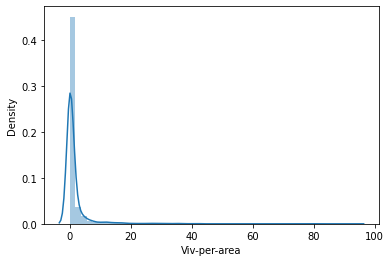

In [75]:
sns.distplot(mun_tourist_gdf['Viv-per-area']);

/home/fterroso/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


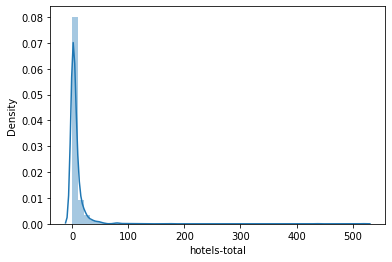

In [76]:
sns.distplot(mun_tourist_gdf['hotels-total']);

/home/fterroso/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


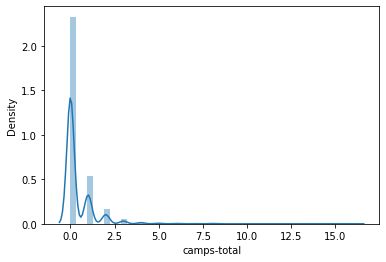

In [77]:
sns.distplot(mun_tourist_gdf['camps-total']);

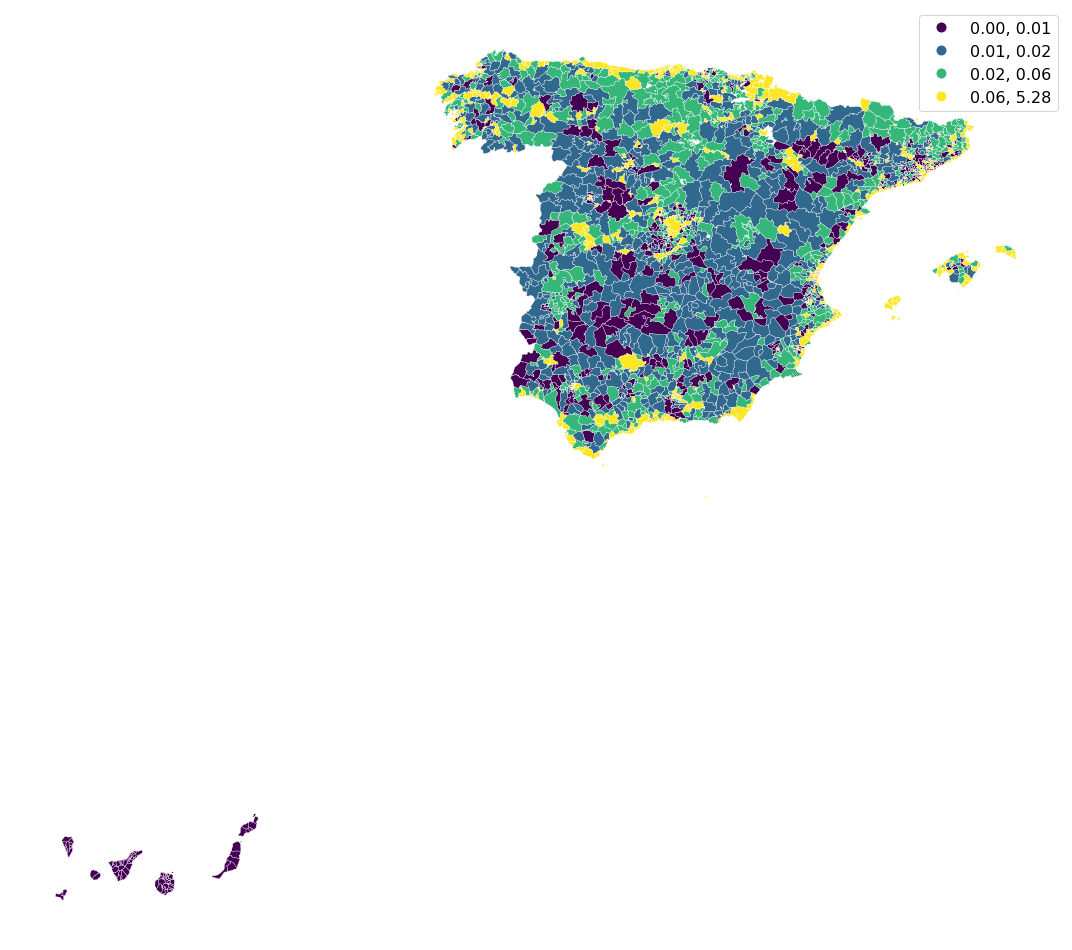

In [87]:
ax= mun_tourist_gdf.plot('hotels-per-area',figsize=(15,15), k=4, scheme='Quantiles', cmap='viridis', legend=True, legend_kwds={'fontsize': 16});
mun_tourist_gdf.boundary.plot(ax=ax, color='white', linewidth=0.2);
ax.set_axis_off()
#ax.legend(prop={'size': 6})
plt.tight_layout()
plt.savefig(os.path.join('figs', 'map_hotels.png'))

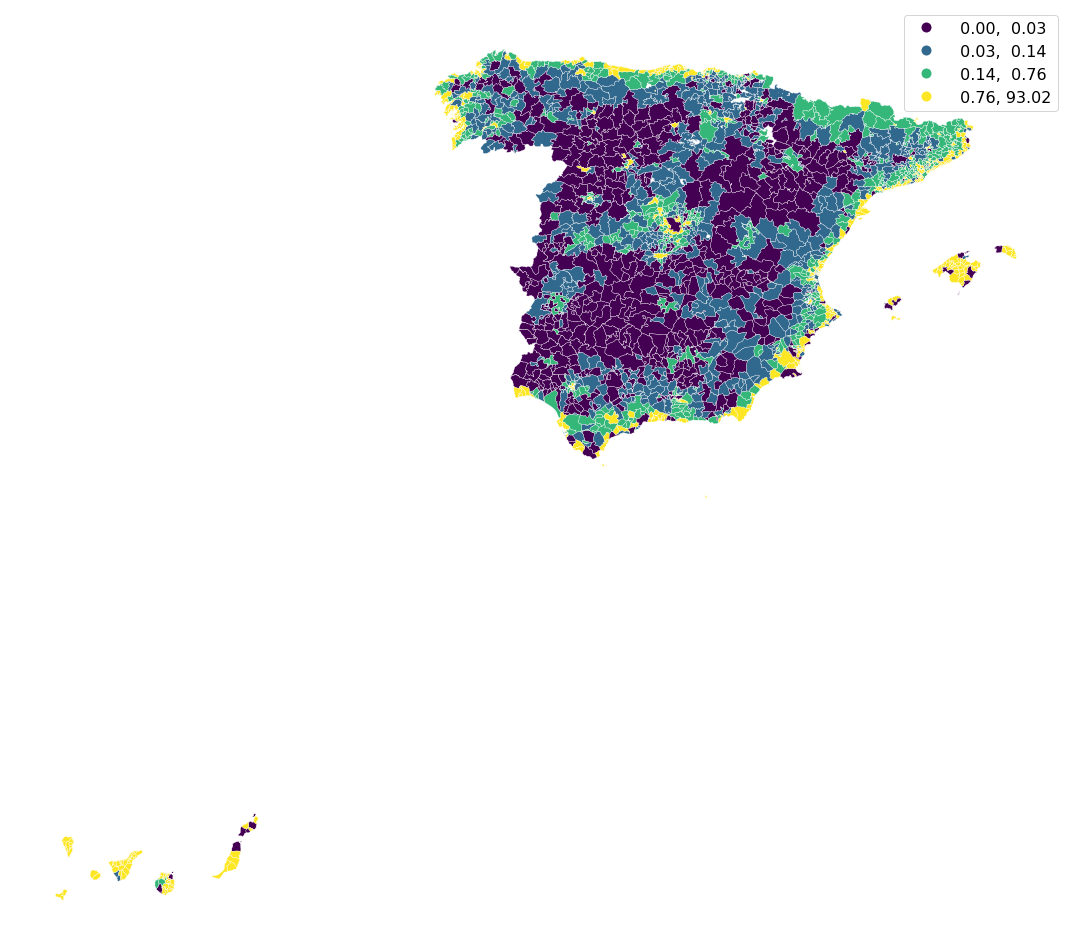

In [88]:
ax=mun_tourist_gdf.plot('Viv-per-area',figsize=(15,15), k=4, scheme='Quantiles',  cmap='viridis', legend=True, legend_kwds={'fontsize': 16});
mun_tourist_gdf.boundary.plot(ax=ax, color='white', linewidth=0.2);
ax.set_axis_off()
plt.tight_layout()
plt.savefig(os.path.join('figs', 'map_touristic_houses.png'))

/home/fterroso/.local/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/fterroso/.local/lib/python3.8/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


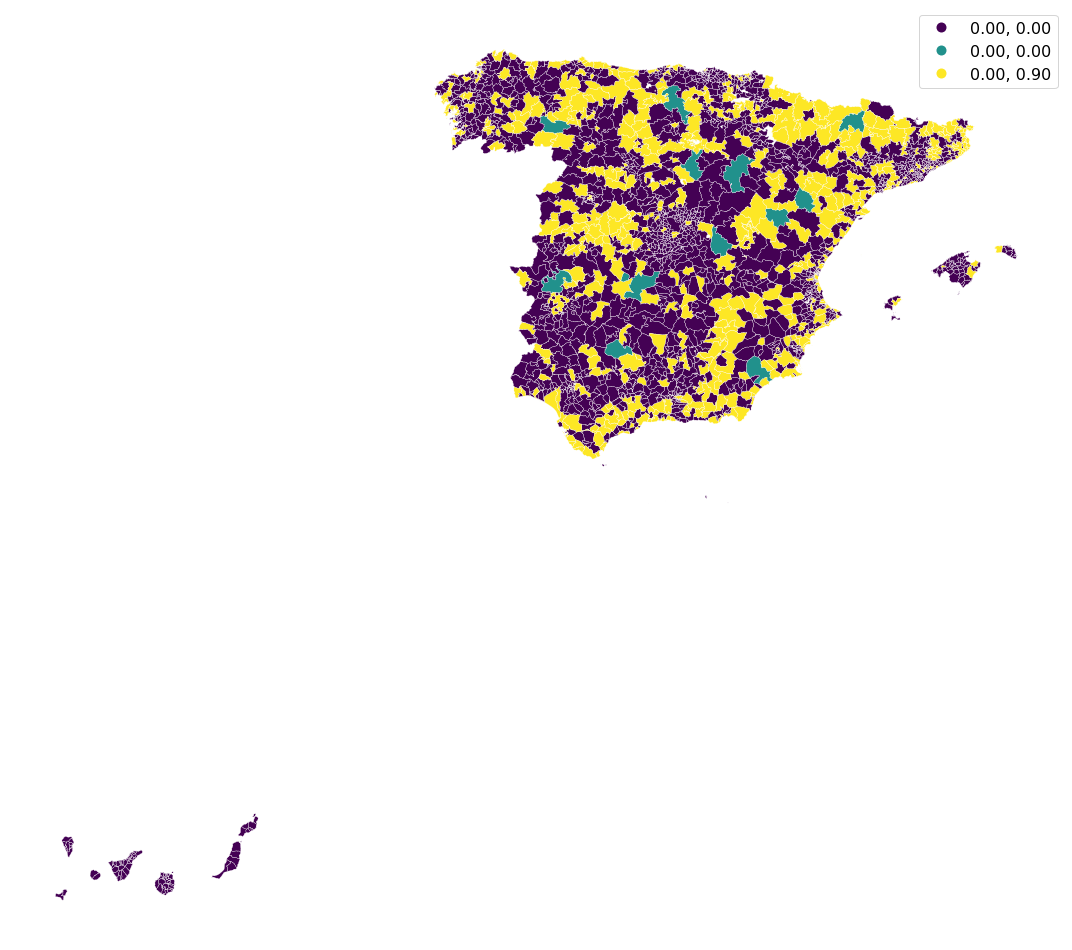

In [89]:
ax=mun_tourist_gdf.plot('camps-per-area',figsize=(15,15), k=4, scheme='Quantiles',  cmap='viridis', legend=True, legend_kwds={'fontsize': 16});
mun_tourist_gdf.boundary.plot(ax=ax, color='white', linewidth=0.2);
ax.set_axis_off()
plt.tight_layout()
plt.savefig(os.path.join('figs', 'map_campsite.png'))

## Spatial autocorrelation

In [18]:
qW = weights.Queen.from_dataframe(mun_tourist_gdf)

C:\Users\ucam\anaconda3\envs\geo_env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 18 disconnected components.
 There are 7 islands with ids: 393, 1631, 1632, 2155, 4396, 5002, 5053.
  warnings.warn(message)


C:\Users\ucam\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ucam\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


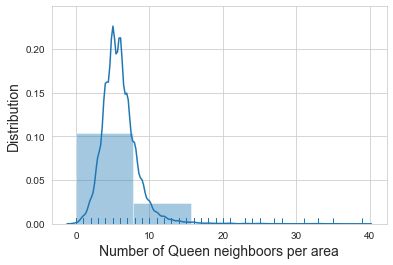

In [19]:
sns.set_style("whitegrid")
ax=sns.distplot(pd.Series(qW.cardinalities), bins=5, rug=True);
ax.set_ylabel('Distribution')
ax.set_xlabel('Number of Queen neighboors per area')
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
#plt.savefig(os.path.join('figs','queen_cardinalities_distribution.png'))

In [20]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(mun_tourist_gdf, k=6)
# Row-standardization
w.transform = 'R'

C:\Users\ucam\anaconda3\envs\geo_env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


In [21]:
mun_tourist_gdf['camps-per-area_lag'] = weights.spatial_lag.lag_spatial(w, mun_tourist_gdf['camps-per-area'])
mun_tourist_gdf['hotels-per-area_lag'] = weights.spatial_lag.lag_spatial(w, mun_tourist_gdf['hotels-per-area'])
mun_tourist_gdf['Viv-per-area_lag'] = weights.spatial_lag.lag_spatial(w, mun_tourist_gdf['Viv-per-area'])

In [43]:
def print_autocorrelation(gdf, column_name):
    f, axs = plt.subplots(1, 2, figsize=(20, 20))
    ax1, ax2 = axs

    gdf.plot(column=column_name, cmap='viridis', scheme='quantiles',
            k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
    ax1.set_axis_off()
    ax1.set_title(f"{column_name}")
    #contextily.add_basemap(ax1, crs=gdf.crs, source=contextily.providers.Stamen.TerrainBackground)

    gdf.plot(column=f'{column_name}_lag', cmap='viridis', scheme='quantiles',
            k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
    ax2.set_axis_off()
    ax2.set_title(f"{column_name}- Spatial Lag")
    #contextily.add_basemap(ax2, crs=gdf.crs, source=contextily.providers.Stamen.TerrainBackground)

    plt.show()

C:\Users\ucam\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\ucam\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


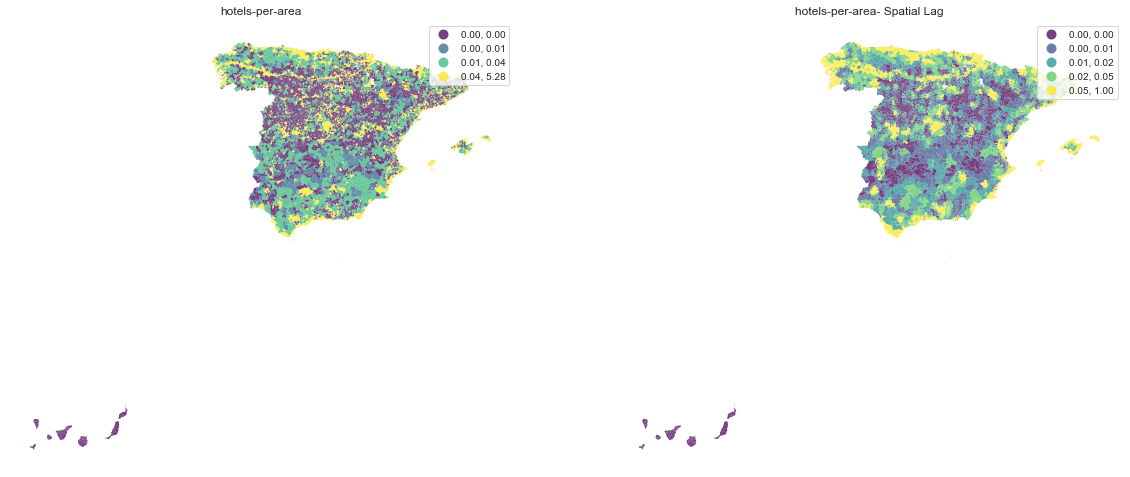

In [44]:
print_autocorrelation(mun_tourist_gdf, 'hotels-per-area')

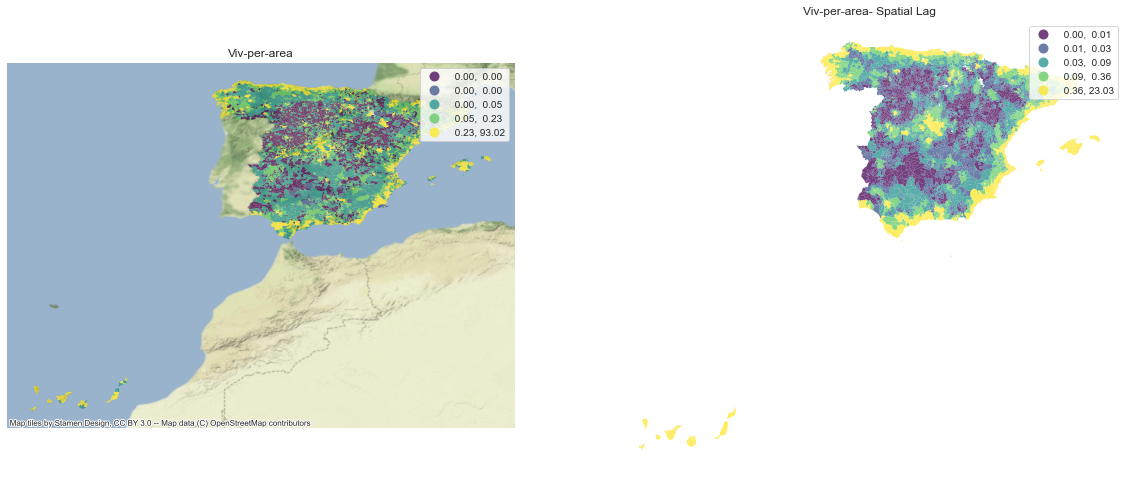

In [24]:
print_autocorrelation(mun_tourist_gdf, 'Viv-per-area')

C:\Users\ucam\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\ucam\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)
C:\Users\ucam\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\ucam\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


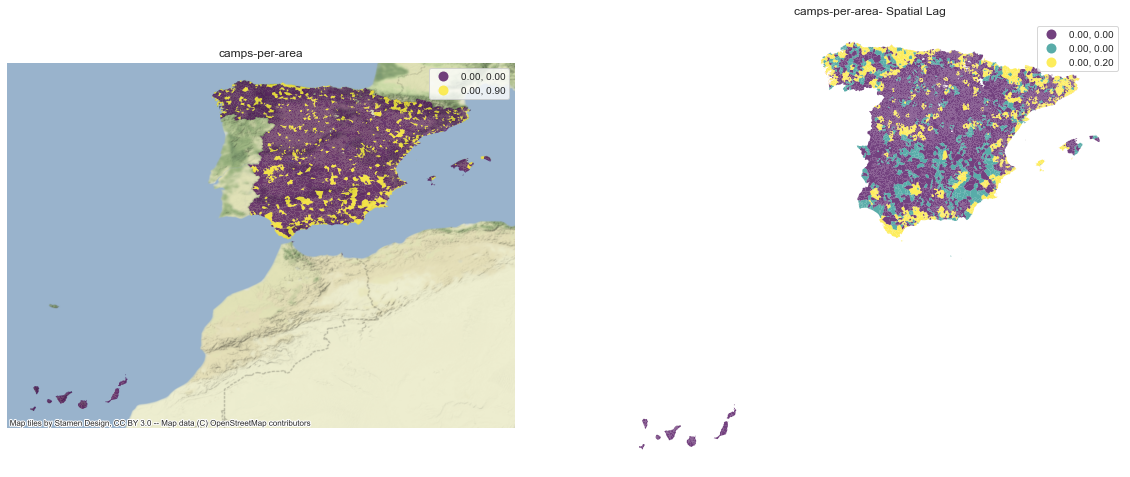

In [25]:
print_autocorrelation(mun_tourist_gdf, 'camps-per-area')

### Moran plot

In [26]:
from sklearn.preprocessing import MinMaxScaler
mun_tourist_gdf[['camps-per-area_std', 'camps-per-area_lag_std']] = MinMaxScaler().fit_transform(mun_tourist_gdf[['camps-per-area', 'camps-per-area_lag']])
mun_tourist_gdf[['Viv-per-area_std', 'Viv-per-area_lag_std']] = MinMaxScaler().fit_transform(mun_tourist_gdf[['Viv-per-area', 'Viv-per-area_lag']])
mun_tourist_gdf[['hotels-per-area_std', 'hotels-per-area_lag_std']] = MinMaxScaler().fit_transform(mun_tourist_gdf[['hotels-per-area', 'hotels-per-area_lag']])

In [27]:
mun_tourist_gdf.corr()

,area_km2,Viv-total,Viv-rel,hotels-total,hotels-rel,camps-total,camps-rel,POB20,HOMBRES,MUJERES,...,camps-per-area,camps-per-area_lag,hotels-per-area_lag,Viv-per-area_lag,camps-per-area_std,camps-per-area_lag_std,Viv-per-area_std,Viv-per-area_lag_std,hotels-per-area_std,hotels-per-area_lag_std
area_km2,1.000000,0.141118,0.013345,0.241944,0.241944,0.183500,0.183500,0.177207,0.181069,0.173715,...,-0.035457,-0.051855,-0.071436,-0.062587,-0.035457,-0.051855,-0.061237,-0.062587,-0.044912,-0.071436
Viv-total,0.141118,1.000000,0.364258,0.215895,0.215895,0.310054,0.310054,0.176152,0.181076,0.171714,...,0.175008,0.159158,0.217783,0.323967,0.175008,0.159158,0.563597,0.323967,0.211285,0.217783
Viv-rel,0.013345,0.364258,1.000000,0.118287,0.118287,0.179009,0.179009,0.019098,0.020215,0.018097,...,0.106621,0.172785,0.159850,0.314737,0.106621,0.172785,0.242402,0.314737,0.165131,0.159850
hotels-total,0.241944,0.215895,0.118287,1.000000,1.000000,0.187273,0.187273,0.868923,0.868111,0.869412,...,0.053521,0.062854,0.138878,0.164606,0.053521,0.062854,0.071320,0.164606,0.499641,0.138878
hotels-rel,0.241944,0.215895,0.118287,1.000000,1.000000,0.187273,0.187273,0.868923,0.868111,0.869412,...,0.053521,0.062854,0.138878,0.164606,0.053521,0.062854,0.071320,0.164606,0.499641,0.138878
camps-total,0.183500,0.310054,0.179009,0.187273,0.187273,1.000000,1.000000,0.101383,0.104667,0.098427,...,0.630669,0.174662,0.151066,0.135855,0.630669,0.174662,0.174962,0.135855,0.154531,0.151066
camps-rel,0.183500,0.310054,0.179009,0.187273,0.187273,1.000000,1.000000,0.101383,0.104667,0.098427,...,0.630669,0.174662,0.151066,0.135855,0.630669,0.174662,0.174962,0.135855,0.154531,0.151066
POB20,0.177207,0.176152,0.019098,0.868923,0.868923,0.101383,0.101383,1.000000,0.999840,0.999873,...,0.026745,0.028992,0.111589,0.147308,0.026745,0.028992,0.076950,0.147308,0.299289,0.111589
HOMBRES,0.181069,0.181076,0.020215,0.868111,0.868111,0.104667,0.104667,0.999840,1.000000,0.999427,...,0.027747,0.030430,0.114445,0.151159,0.027747,0.030430,0.079261,0.151159,0.301554,0.114445
MUJERES,0.173715,0.171714,0.018097,0.869412,0.869412,0.098427,0.098427,0.999873,0.999427,1.000000,...,0.025844,0.027702,0.109012,0.143835,0.025844,0.027702,0.074868,0.143835,0.297189,0.109012


In [28]:
def plot_moran(df, column_name):
    f, ax = plt.subplots(1, figsize=(6, 6))
    sns.regplot(x=f'{column_name}_std', y=f'{column_name}_lag_std', 
                    ci=None, data=df, line_kws={'color':'r'})
    ax.axvline(0, c='k', alpha=0.5)
    ax.axhline(0, c='k', alpha=0.5)
    ax.set_title(f'Moran Plot - {column_name}')
    plt.show()

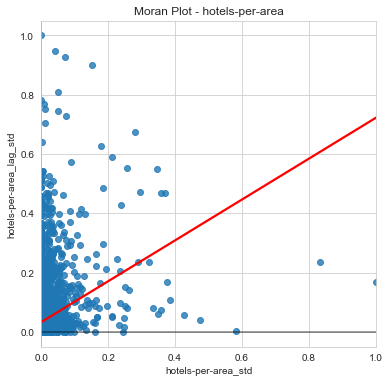

In [29]:
plot_moran(mun_tourist_gdf, 'hotels-per-area')

In [30]:
w.transform = 'R'
moran = esda.moran.Moran(mun_tourist_gdf['hotels-per-area'], w)
print(moran.I, moran.p_sim)

0.130515864787989 0.001


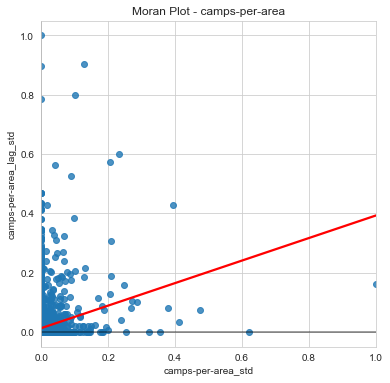

In [31]:
plot_moran(mun_tourist_gdf, 'camps-per-area')

In [32]:
moran = esda.moran.Moran(mun_tourist_gdf['camps-per-area'], w)
print(moran.I, moran.p_sim)

0.08372134015116178 0.001


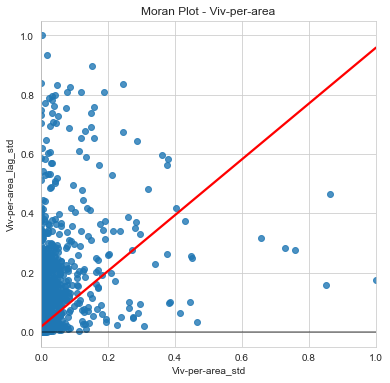

In [33]:
plot_moran(mun_tourist_gdf, 'Viv-per-area')

In [41]:
moran = esda.moran.Moran(mun_tourist_gdf['Viv-per-area'], w)
print(moran.I, moran.p_sim)

0.2329274912782827 0.001


In [36]:
mun_tourist_gdf.columns

Index(['CODIGOINE', 'NATCODE', 'area_km2', 'Viv-total', 'Viv-rel', 'Name',
       'hotels-total', 'hotels-rel', 'camps-total', 'camps-rel', 'POB20',
       'HOMBRES', 'MUJERES', 'Viv-per-pop', 'hotels-per-pop', 'camps-per-pop',
       'Viv-per-area', 'hotels-per-area', 'camps-per-area', 'geometry',
       'camps-per-area_lag', 'hotels-per-area_lag', 'Viv-per-area_lag',
       'camps-per-area_std', 'camps-per-area_lag_std', 'Viv-per-area_std',
       'Viv-per-area_lag_std', 'hotels-per-area_std',
       'hotels-per-area_lag_std'],
      dtype='object')

In [39]:
mun_tourist_gdf[['Viv-per-area', 'hotels-per-area', 'camps-per-area', 'Viv-per-area_lag',  'hotels-per-area_lag', 'camps-per-area_lag']].corr()

,Viv-per-area,hotels-per-area,camps-per-area,Viv-per-area_lag,hotels-per-area_lag,camps-per-area_lag
Viv-per-area,1.000000,0.322199,0.273877,0.425014,0.280794,0.191372
hotels-per-area,0.322199,1.000000,0.182409,0.260419,0.280372,0.168915
camps-per-area,0.273877,0.182409,1.000000,0.167837,0.170499,0.185773
Viv-per-area_lag,0.425014,0.260419,0.167837,1.000000,0.479296,0.396423
hotels-per-area_lag,0.280794,0.280372,0.170499,0.479296,1.000000,0.365264
camps-per-area_lag,0.191372,0.168915,0.185773,0.396423,0.365264,1.000000
